In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('salary_prediction_of_data_professions.csv')
df.shape

(2639, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2631 non-null   object 
 1   LAST NAME         2631 non-null   object 
 2   SEX               2631 non-null   object 
 3   DOJ               2631 non-null   object 
 4   CURRENT DATE      2631 non-null   object 
 5   DESIGNATION       2631 non-null   object 
 6   AGE               2631 non-null   float64
 7   SALARY            2631 non-null   int64  
 8   UNIT              2631 non-null   object 
 9   LEAVES USED       2631 non-null   float64
 10  LEAVES REMAINING  2631 non-null   float64
 11  RATINGS           2631 non-null   float64
 12  PAST EXP          2631 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 287.8+ KB


In [8]:
df.isna().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [9]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])
df.dtypes

FIRST NAME                  object
LAST NAME                   object
SEX                         object
DOJ                 datetime64[ns]
CURRENT DATE        datetime64[ns]
DESIGNATION                 object
AGE                        float64
SALARY                       int64
UNIT                        object
LEAVES USED                float64
LEAVES REMAINING           float64
RATINGS                    float64
PAST EXP                     int64
dtype: object

In [10]:
df['tenure'] = (df['CURRENT DATE'] - df['DOJ']).astype('timedelta64[ns]')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,tenure
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599 days
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528 days
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009 days
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,857 days
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,557 days


In [11]:
df['join_year'] = df['DOJ'].dt.year
df['join_month'] = df['DOJ'].dt.month
df['join_day'] = df['DOJ'].dt.day
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,tenure,join_year,join_month,join_day
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599 days,2014,5,18
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528 days,2014,7,28
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009 days,2013,4,3
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,857 days,2013,9,2
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,557 days,2014,6,29


In [12]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
tenure              0
join_year           0
join_month          0
join_day            0
dtype: int64

In [13]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,tenure,join_year,join_month,join_day
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599 days,2014,5,18
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528 days,2014,7,28
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009 days,2013,4,3
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,857 days,2013,9,2
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,557 days,2014,6,29


In [14]:
import re

In [15]:
df['tenure']

0       599 days
2       528 days
3      1009 days
6       857 days
8       557 days
          ...   
2634   1654 days
2635    723 days
2636    714 days
2637    661 days
2638    476 days
Name: tenure, Length: 2631, dtype: timedelta64[ns]

In [16]:
def extract_numbers(text):
  numbers = re.findall(r'\d+', text)
  return ''.join(numbers)

df['tenure'] = df['tenure'].astype(str)
df['tenure_number'] = df['tenure'].apply(extract_numbers)
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,tenure,join_year,join_month,join_day,tenure_number
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599 days,2014,5,18,599
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528 days,2014,7,28,528
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009 days,2013,4,3,1009
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,857 days,2013,9,2,857
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,557 days,2014,6,29,557


In [17]:
df.drop(columns=['tenure'], inplace=True)
df.rename(columns={'tenure_number': 'tenure'}, inplace=True)
df['tenure'] = df['tenure'].astype('int')
print(df.dtypes)
df.head()

FIRST NAME                  object
LAST NAME                   object
SEX                         object
DOJ                 datetime64[ns]
CURRENT DATE        datetime64[ns]
DESIGNATION                 object
AGE                        float64
SALARY                       int64
UNIT                        object
LEAVES USED                float64
LEAVES REMAINING           float64
RATINGS                    float64
PAST EXP                     int64
join_year                    int32
join_month                   int32
join_day                     int32
tenure                       int32
dtype: object


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,join_year,join_month,join_day,tenure
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2014,5,18,599
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2014,7,28,528
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2013,4,3,1009
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2013,9,2,857
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,2014,6,29,557


<Axes: >

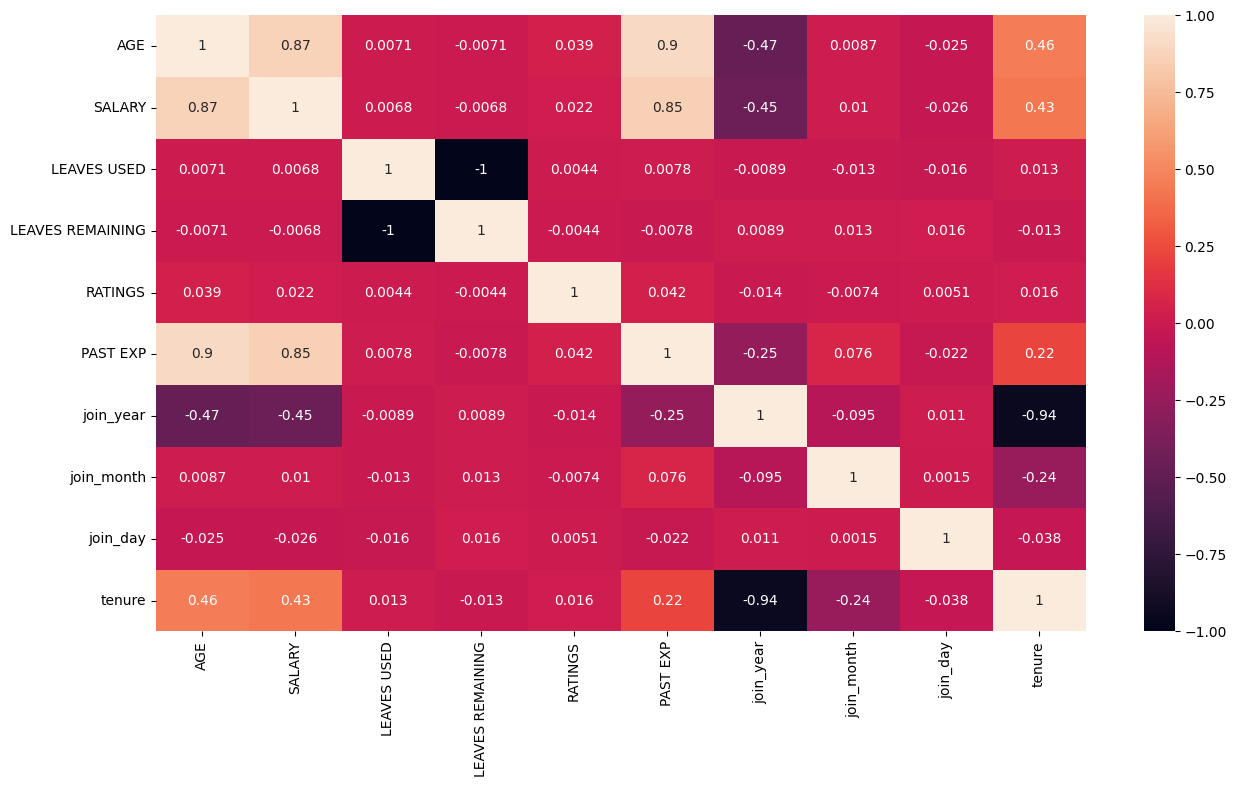

In [18]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True)

In [19]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP', 'join_year', 'join_month', 'join_day', 'tenure'],
      dtype='object')

In [20]:
df.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE', 'LEAVES USED', 'LEAVES REMAINING'], inplace=True)

In [21]:
df.columns

Index(['SEX', 'DESIGNATION', 'AGE', 'SALARY', 'UNIT', 'RATINGS', 'PAST EXP',
       'join_year', 'join_month', 'join_day', 'tenure'],
      dtype='object')

In [22]:
print(df['UNIT'].unique())
print(df['DESIGNATION'].unique())
print(df['RATINGS'].unique())

['Finance' 'IT' 'Marketing' 'Operations' 'Web' 'Management']
['Analyst' 'Senior Analyst' 'Associate' 'Senior Manager' 'Manager'
 'Director']
[2. 3. 5. 4.]


In [23]:
pd.crosstab(df['UNIT'], df['DESIGNATION'], normalize='index') * 100

DESIGNATION,Analyst,Associate,Director,Manager,Senior Analyst,Senior Manager
UNIT,,,,,,
Finance,71.460674,5.842697,0.898876,4.494382,15.505618,1.797753
IT,76.086957,5.217391,1.739130,2.826087,11.086957,3.043478
Management,72.000000,6.588235,1.176471,3.294118,14.117647,2.823529
Marketing,71.330275,6.422018,1.146789,2.752294,15.137615,3.211009
Operations,76.887872,5.720824,0.686499,2.288330,12.585812,1.830664
Web,75.233645,6.308411,1.635514,2.803738,12.850467,1.168224


In [24]:
print(df.groupby('UNIT')['SALARY'].mean())
print('\n\n',df.groupby('DESIGNATION')['SALARY'].mean())

UNIT
Finance       58369.856180
IT            59028.947826
Management    59186.941176
Marketing     59386.490826
Operations    55506.112128
Web           57188.058411
Name: SALARY, dtype: float64


 DESIGNATION
Analyst            45022.566135
Associate          87190.297468
Director          286971.187500
Manager           126272.592593
Senior Analyst     59901.345506
Senior Manager    178960.196721
Name: SALARY, dtype: float64


In [25]:
print(df['UNIT'].value_counts())
print('\n\n', df['DESIGNATION'].value_counts())

UNIT
IT            460
Finance       445
Operations    437
Marketing     436
Web           428
Management    425
Name: count, dtype: int64


 DESIGNATION
Analyst           1943
Senior Analyst     356
Associate          158
Manager             81
Senior Manager      61
Director            32
Name: count, dtype: int64


In [26]:
df = pd.get_dummies(df, columns=['join_year', 'join_month', 'join_day'], dtype=int)
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP,tenure,join_year_2009,join_year_2010,...,join_day_22,join_day_23,join_day_24,join_day_25,join_day_26,join_day_27,join_day_28,join_day_29,join_day_30,join_day_31
0,F,Analyst,21.0,44570,Finance,2.0,0,599,0,0,...,0,0,0,0,0,0,0,0,0,0
2,F,Analyst,21.0,40955,Finance,3.0,0,528,0,0,...,0,0,0,0,0,0,1,0,0,0
3,F,Analyst,22.0,45550,IT,3.0,0,1009,0,0,...,0,0,0,0,0,0,0,0,0,0
6,M,Analyst,22.0,40339,Marketing,5.0,0,857,0,0,...,0,0,0,0,0,0,0,0,0,0
8,F,Senior Analyst,28.0,63478,Operations,3.0,1,557,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
df['DESIGNATION'].value_counts()

DESIGNATION
Analyst           1943
Senior Analyst     356
Associate          158
Manager             81
Senior Manager      61
Director            32
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler

In [29]:
designation_order = [
    'Analyst', 'Senior Analyst', 'Associate', 'Manager', 'Senior Manager', 'Director'
]

In [30]:
desig_ordinal_encoder = OrdinalEncoder(categories=[designation_order])
rating_ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
label_encoder = LabelEncoder()
standard_scaler = StandardScaler()

In [31]:
df['SEX'] = label_encoder.fit_transform(df[['SEX']])
df['UNIT'] = onehot_encoder.fit_transform(df[['UNIT']])
df['DESIGNATION'] = desig_ordinal_encoder.fit_transform(df[['DESIGNATION']])
df['RATINGS'] = rating_ordinal_encoder.fit_transform(df[['RATINGS']])

c:\Users\kurtj\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(desig_ordinal_encoder.categories_)
print(rating_ordinal_encoder.categories_)

[array(['Analyst', 'Senior Analyst', 'Associate', 'Manager',
       'Senior Manager', 'Director'], dtype=object)]
[array([2., 3., 4., 5.])]


In [33]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP,tenure,join_year_2009,join_year_2010,...,join_day_22,join_day_23,join_day_24,join_day_25,join_day_26,join_day_27,join_day_28,join_day_29,join_day_30,join_day_31
0,0,0.0,21.0,44570,0.0,0.0,0,599,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,21.0,40955,0.0,1.0,0,528,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.0,22.0,45550,1.0,1.0,0,1009,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0.0,22.0,40339,0.0,3.0,0,857,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1.0,28.0,63478,0.0,1.0,1,557,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# Normalizing using Z-score

df['AGE'] = (df['AGE'] - df['AGE'].mean()) / df['AGE'].std()
df['tenure'] = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()

The code above uses Z-score, now down below will be codes for using Simple Feature Scaling and also the Min-Max method

```
df['AGE'] = df['AGE'] / df['AGE'].max()
df['tenure'] = df['tenure'] / df['tenure'].max()


df['AGE'] = (df['AGE'] - df['AGE'].min) / (df['AGE'].max() - df['AGE'].min())
df['tenure'] = (df['tenure'] - df['tenure'].min) / (df['tenure'].max() - df['tenure'].min())

```

In [35]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP,tenure,join_year_2009,join_year_2010,...,join_day_22,join_day_23,join_day_24,join_day_25,join_day_26,join_day_27,join_day_28,join_day_29,join_day_30,join_day_31
0,0,0.0,-0.961621,44570,0.0,0.0,0,-0.615199,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,-0.961621,40955,0.0,1.0,0,-0.832171,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.0,-0.705520,45550,1.0,1.0,0,0.637741,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0.0,-0.705520,40339,0.0,3.0,0,0.173237,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1.0,0.831088,63478,0.0,1.0,1,-0.743549,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X = df.drop(columns=['SALARY'])
y = df['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 129563791.27964896
R-squared: 0.8964675632927294


In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 88716650.68311195
R-squared: 0.9291078863082555


In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_pred = forest_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 55936364.79915272
R-squared: 0.9553021095554131


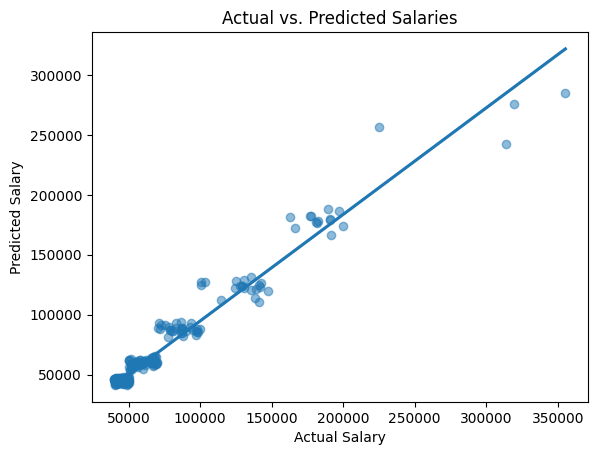

In [45]:
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={'alpha': 0.5})
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()